# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> We need to investigate whether the gender or age of the affect the probability of patient's not showing to their appointment

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [20]:
#Importing packages and data
def load_data():
    import pandas as pd
    import numpy as np

    df = pd.read_csv('no_show.csv')
    return df

In [21]:
# Loading and ssessing Data
df=load_data()
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


A number of characteristics about the patient are included in each row:

**ScheduledDay** tells us on what day the patient set up their appointment.
**Neighborhood** indicates the location of the hospital.
**Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
The encoding of the **no-show** column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here, we can notice a problem that the minimum value for age is -1, so we will mask any value for the age that is less than zero and drop it.

Now we can see the negative age was removed

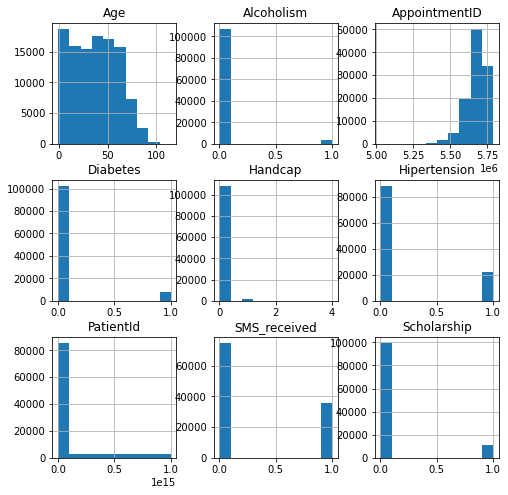

In [5]:
df.hist(figsize=(8, 8));

### Data Cleaning

Renaming all comumns to lowercase for more convenience, dropping unnecessary columns, and checking for any duplicates or missing data

In [6]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [7]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
sum(df.duplicated())

0

In [9]:
df.drop(['patientid', 'appointmentid', 'scholarship', 'diabetes', 'alcoholism','handcap', 'hipertension', 'neighbourhood', 'sms_received'], axis=1, inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110527 non-null  object
 1   scheduledday    110527 non-null  object
 2   appointmentday  110527 non-null  object
 3   age             110527 non-null  int64 
 4   no-show         110527 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.5+ MB


In [11]:
sum(df.duplicated())

1499

Good thing we don't have any missing data but after deleting the unnecessery columns some duplicates apeared

In [12]:
df.drop_duplicates()

,gender,scheduledday,appointmentday,age,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,No
...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,No


Now, Let's solve the problem of the negative age

In [13]:
df=df[df['age']>=0]
df.describe()

,age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Now, our data is nice and clean!

<a id='eda'></a>
## Exploratory Data Analysis

>Now that we've trimmed and cleaned our data, you're ready to move on to exploration.



Let's first see the propability of a patient's not showing up

In [14]:
df[df['no-show']=="Yes"].shape[0]/df.shape[0]*100

20.193438647919944

Better represent the ratio visually:

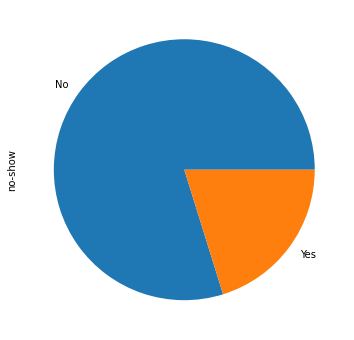

In [15]:
#represet the ratio with pie chart
df['no-show'].value_counts().plot(kind='pie', figsize=(6, 6));

Let's separate patients into two masks regarding the no-show column value 

In [16]:
showed_up = df[df['no-show'] == 'No']
no_show = df[df['no-show'] == 'Yes']

### Q1: Does the age of the patient affect the probability of them showing up?

First let's see the mean age of both the patients who show up for their appointment and who don't.

In [17]:
showed_up['age'].mean()

37.790504154999034

In [18]:
no_show['age'].mean()

34.31766656212196

Now let's see the distribution of the age of the two categories

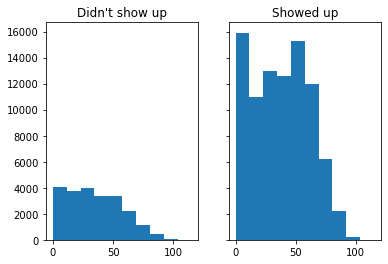

In [24]:
#showed_up.hist(column='age', alpha=0.5, color='blue', label="Showed Up", figsize=(8, 6), sharex=True, sharey=True);
#no_show.hist(column='age', alpha=0.5, color='orange', label="No-show", figsize=(8, 6), sharex=True, sharey=True);

#showed_up['age'].hist(color='blue', label="Showed Up", figsize=(8, 6));
#no_show['age'].hist(color='orange', label="No-show", figsize=(8, 6));

import matplotlib.pyplot as plt
%matplotlib inline
    
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(no_show['age'])
ax2.hist(showed_up['age'])
ax1.set_title("Didn't show up")
ax2.set_title("Showed up");


Seems that older peaople tend to miss their appointments a little bit more.

### Q2: Does the gender affect the probability of a patient's showing up?

Let's separate patients into two masks regarding their gender to count the probability for each gender showing up separately.

In [ ]:
male = df[df['gender']=='M']
male[male['no-show']=='Yes'].shape[0]/male.shape[0]*100

In [ ]:
male['no-show'].value_counts().plot(kind='pie', figsize=(6, 6));

19.9% of males miss their appointments.

In [ ]:
female = df[df['gender']=="F"]
female[female['no-show']=='Yes'].shape[0]/female.shape[0]*100

In [ ]:
female['no-show'].value_counts().plot(kind='pie', figsize=(6, 6));

20.3% of females miss their appointments.

<a id='conclusions'></a>
## Conclusions


>ِAnalysing the mean values of the age, turns out that older people tend to not show more whilecwe can notice that young patients from 0 to around 18 years old stick to their appointments more.

>But, It's no big defference between males and females, around 19.9% of males don't show up for their appointments, around 23.3% of females don't show up for their appointments.

### Limitations
>Good thing the data provided had almost no limitations as it was large enough and it could answer my questions very effeciently.

In [ ]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])